## IMPLEMENTING A SIMPLIFIED ATTENTION MECHANISM

<div class="alert alert-block alert-success">

Consider the following input sentence, which has already been embedded into 3-
dimensional vectors. 

We choose a small embedding dimension for
illustration purposes to ensure it fits on the page without line breaks:

</div>

In [8]:
import torch

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

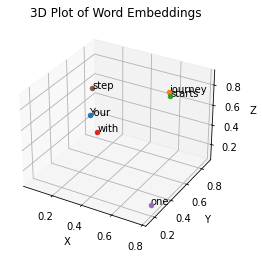

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Corresponding words
words = ['Your', 'journey', 'starts', 'with', 'one', 'step']

# Extract x, y, z coordinates
x_coords = inputs[:, 0].numpy()
y_coords = inputs[:, 1].numpy()
z_coords = inputs[:, 2].numpy()

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each point and annotate with corresponding word
for x, y, z, word in zip(x_coords, y_coords, z_coords, words):
    ax.scatter(x, y, z)
    ax.text(x, y, z, word, fontsize=10)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('3D Plot of Word Embeddings')
plt.show()

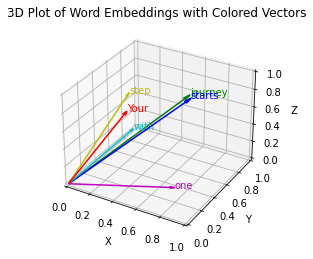

In [10]:
# Create 3D plot with vectors from origin to each point, using different colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define a list of colors for the vectors
colors = ['r', 'g', 'b', 'c', 'm', 'y']

# Plot each vector with a different color and annotate with the corresponding word
for (x, y, z, word, color) in zip(x_coords, y_coords, z_coords, words, colors):
    # Draw vector from origin to the point (x, y, z) with specified color and smaller arrow length ratio
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, word, fontsize=10, color=color)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot limits to keep arrows within the plot boundaries
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

plt.title('3D Plot of Word Embeddings with Colored Vectors')
plt.show()


<div class="alert alert-block alert-info">
    
Each row represents a word, and each column represents an embedding dimension
    
</div>

<div class="alert alert-block alert-info">
    
The second input token serves as the query    
</div>

In [11]:
## 2nd INPUT TOKEN IS THE QUERY 
query=inputs[1]

attn_score_2=torch.empty(inputs.shape[0])

for i,x_i in enumerate(inputs):
    ## DOT PRODUCT (TRANSPOSE NOT NECESSARY HERE SINCE THEY ARE 1 DIM VECTORS)
    attn_score_2[i]=torch.dot(x_i,query)
print(attn_score_2)

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


<div class="alert alert-block alert-success">

In the next step, we normalize each of the attention scores that
we computed previously.

</div>

<div class="alert alert-block alert-success">

The main goal behind the normalization  is to obtain attention weights
that sum up to 1. 

This normalization is a convention that is useful for interpretation and for
maintaining training stability in an LLM. 

Here's a straightforward method for achieving this
normalization step:

</div>

In [12]:
attn_weights_2_temp=attn_score_2/attn_score_2.sum()
print("attention score:",attn_weights_2_temp)
print("Sum:",attn_weights_2_temp.sum())

attention score: tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
Sum: tensor(1.0000)


<div class="alert alert-block alert-info">
    
In practice, it's more common and advisable to use the softmax function for normalization.

This approach is better at managing extreme values and offers more favorable gradient
properties during training. 

Below is a basic implementation of the softmax function for
normalizing the attention scores: 
</div>

In [15]:
def softmax_naive(x):
    return torch.exp(x)/torch.exp(x).sum(dim=0)

attn_score_2_naive=softmax_naive(attn_score_2)

print("Attention weights:",attn_score_2_naive)

print("Sum: ",attn_score_2_naive.sum())

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum:  tensor(1.)


<div class="alert alert-block alert-info">
    
As the output shows, the softmax function also meets the objective and normalizes the
attention weights such that they sum to 1:
</div>

<div class="alert alert-block alert-warning">

In addition, the softmax function ensures that the attention weights are always positive.
This makes the output interpretable as probabilities or relative importance, where higher
weights indicate greater importance.
    
</div>

<div class="alert alert-block alert-warning">

Note that this naive softmax implementation (softmax_naive) may encounter numerical
instability problems, such as overflow and underflow, when dealing with large or small input
values. 

Therefore, in practice, it's advisable to use the PyTorch implementation of softmax,
which has been extensively optimized for performance:
    
</div>

In [16]:
attn_weights_2 = torch.softmax(attn_score_2, dim=0)
print("Attention weights:", attn_weights_2)
print("Sum:", attn_weights_2.sum())

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


<div class="alert alert-block alert-info">
    
In this case, we can see that it yields the same results as our previous softmax_naive
function:
</div>

<div class="alert alert-block alert-success">

The context vector z(2)is calculated as a weighted sum of all input
vectors. 

This involves multiplying each input vector by its corresponding attention weight:

</div>

In [28]:
## 2nd INPUT TOKEN IS THE QUERY
query=inputs[1]

context_vect_2=torch.zeros(query.shape)
for i,x_i in enumerate(inputs):
    context_vect_2+=attn_weights_2[i]*x_i
print(context_vect_2)

tensor([0.4419, 0.6515, 0.5683])


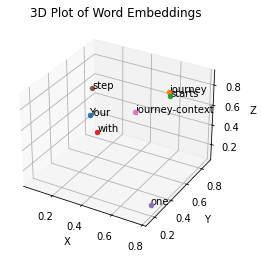

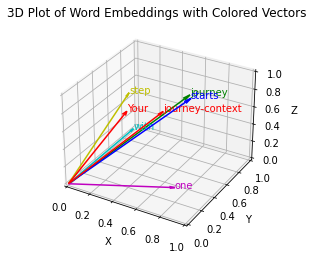

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55], # step     (x^6)
   [0.4419, 0.6515, 0.5683]]
)

# Corresponding words
words = ['Your', 'journey', 'starts', 'with', 'one', 'step', 'journey-context']

# Extract x, y, z coordinates
x_coords = inputs[:, 0].numpy()
y_coords = inputs[:, 1].numpy()
z_coords = inputs[:, 2].numpy()

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each point and annotate with corresponding word
for x, y, z, word in zip(x_coords, y_coords, z_coords, words):
    ax.scatter(x, y, z)
    ax.text(x, y, z, word, fontsize=10)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('3D Plot of Word Embeddings')
plt.show()

# Create 3D plot with vectors from origin to each point, using different colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define a list of colors for the vectors
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'r']

# Plot each vector with a different color and annotate with the corresponding word
for (x, y, z, word, color) in zip(x_coords, y_coords, z_coords, words, colors):
    # Draw vector from origin to the point (x, y, z) with specified color and smaller arrow length ratio
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, word, fontsize=10, color=color)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot limits to keep arrows within the plot boundaries
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

plt.title('3D Plot of Word Embeddings with Colored Vectors')
plt.show()

tensor([0.0596, 0.0208, 0.1233])

tensor([0.1308, 0.2070, 0.1570])